# 2nd. Recommendation

### Here we use the top 5 Movie Studios to find the genres with the biggest domestic gross and mean domestic gross

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

1st_Recommendation.ipynb     bom.movie_gross.csv
2nd_reco_total_gross.png     bom.movie_gross.csv.gz
2nd_reco_total_meangross.png df_final_raiting.csv
2nd_recommendaX.ipynb        dgf1.csv
2nd_recommendation.ipynb     first_recomendation.png
3rd_recommendation.ipynb     graph_genre.csv
3rdreco_full_rating.png      imdb.title.basics.csv
3rdreco_mean_rating.png      imdb.title.basics.csv.gz
3rdreco_mean_rating2.png     imdb.title.ratings.csv.gz
FIX gross.ipynb              main_data.ipynb
FIX movie titles.ipynb       mix data 1 y 2.ipynb
Gross.ipynb                  raiting_recom3.csv
Main_Data.csv                raiting_recom3x.csv
Movie Ratings.ipynb          spread_raiting.csv
Spread data                  top_studios.csv
Titles details.ipynb         video14078756925.mp4
Untitled.ipynb


In [3]:
#IMPORTING MAIN DATA FRAME 

df = pd.read_csv("/Users/christopherfreyre/Documents/Academy Xi/Project_one/main_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2549 non-null   int64  
 1   tconst          2549 non-null   object 
 2   primary_title   2549 non-null   object 
 3   genres          2548 non-null   object 
 4   studio          2546 non-null   object 
 5   domestic_gross  2532 non-null   float64
 6   foreign_gross   1532 non-null   object 
 7   year            2549 non-null   int64  
 8   averagerating   2549 non-null   float64
 9   numvotes        2549 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 199.3+ KB


In [5]:
df.head()

,Unnamed: 0,tconst,primary_title,genres,studio,domestic_gross,foreign_gross,year,averagerating,numvotes
0,0,tt0315642,Wazir,"Action,Crime,Drama",Relbig.,1100000.0,NaN,2016,7.1,15378
1,1,tt0337692,On the Road,"Adventure,Drama,Romance",IFC,744000.0,8000000,2012,6.1,37886
2,2,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",Fox,58200000.0,129900000,2013,7.3,275300
3,3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",Uni.,26300000.0,26900000,2014,6.5,105116
4,4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,652300000.0,"1,019.4",2015,7.0,539338


In [6]:
#HOW MANY YEARS OF DATA FRAME
set(df['year'])

{2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}

In [7]:
#HOW MANY STUDIOS WE HAVE IN DATA FRAME

len(set(df['studio']))

213

In [8]:
df.columns

Index(['Unnamed: 0', 'tconst', 'primary_title', 'genres', 'studio',
       'domestic_gross', 'foreign_gross', 'year', 'averagerating', 'numvotes'],
      dtype='object')

In [9]:
#REDUCTION OF COLUMNS NO NEEDED IN DATAFRAME FOR TOP 5 MOVIE STUDIOS
df1 = df.loc[:2549, ['primary_title', 'genres', 'studio', 'domestic_gross',
         'averagerating', 'year'
                      ]].sort_values('domestic_gross', ascending = False)
df1

,primary_title,genres,studio,domestic_gross,averagerating,year
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,700100000.0,7.3,2018
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,678800000.0,8.5,2018
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,652300000.0,7.0,2015
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,620200000.0,7.1,2017
1943,Incredibles 2,"Action,Adventure,Animation",BV,608600000.0,7.7,2018
...,...,...,...,...,...,...
1204,Force,"Action,Thriller",FoxS,NaN,6.4,2011
1329,Keith Lemon: The Film,Comedy,NaN,NaN,2.6,2012
1445,Jessabelle,"Horror,Thriller",LGF,NaN,5.4,2014
1631,Viral,"Comedy,Horror,Thriller",W/Dim.,NaN,4.4,2016


### TOP 5 Movie Studios


In [10]:
#TOP 5 STUDIOS WITH ALL THEIR MOVIES
df5_studios = df1[df1['studio'].isin (['BV', 'Uni.', 'Fox', 'WB', 'Sony'])]
df5_studios 

,primary_title,genres,studio,domestic_gross,averagerating,year
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,700100000.0,7.3,2018
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,678800000.0,8.5,2018
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,652300000.0,7.0,2015
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,620200000.0,7.1,2017
1943,Incredibles 2,"Action,Adventure,Animation",BV,608600000.0,7.7,2018
...,...,...,...,...,...,...
2449,Poster Boys,Comedy,Sony,97000.0,5.6,2017
2197,Loving Pablo,"Action,Biography,Crime",Uni.,22000.0,6.3,2018
2315,The Duelist,"Action,Drama,Thriller",Sony,13500.0,6.4,2016
1675,Oro,Documentary,Sony,5500.0,8.7,2017


In [11]:
#SAVING MERGE OF DATA FRAME AS A MAIN_DATA.CSV FILE

df5_studios.to_csv("/Users/christopherfreyre/Documents/Academy Xi/Project_one/spread_raiting.csv")

In [12]:
#MAKING A COPY OF THE DATAFRAME

df5_studios1 = df5_studios.copy()

In [13]:
#SPLITING GENRES INTO NEW COLUMNS

df5_studios1[['genre_1', 'genre_2', 'genre_3']] = df5_studios1['genres'].str.split(',' ,expand=True)
df5_studios1

,primary_title,genres,studio,domestic_gross,averagerating,year,genre_1,genre_2,genre_3
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,700100000.0,7.3,2018,Action,Adventure,Sci-Fi
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,678800000.0,8.5,2018,Action,Adventure,Sci-Fi
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,652300000.0,7.0,2015,Action,Adventure,Sci-Fi
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,620200000.0,7.1,2017,Action,Adventure,Fantasy
1943,Incredibles 2,"Action,Adventure,Animation",BV,608600000.0,7.7,2018,Action,Adventure,Animation
...,...,...,...,...,...,...,...,...,...
2449,Poster Boys,Comedy,Sony,97000.0,5.6,2017,Comedy,None,None
2197,Loving Pablo,"Action,Biography,Crime",Uni.,22000.0,6.3,2018,Action,Biography,Crime
2315,The Duelist,"Action,Drama,Thriller",Sony,13500.0,6.4,2016,Action,Drama,Thriller
1675,Oro,Documentary,Sony,5500.0,8.7,2017,Documentary,None,None


In [14]:
#DROPPING GENRES OLD COLUMN AS NO NEEDED

df5_studios1.drop(columns = ['genres'], inplace = True)
df5_studios1

,primary_title,studio,domestic_gross,averagerating,year,genre_1,genre_2,genre_3
1035,Black Panther,BV,700100000.0,7.3,2018,Action,Adventure,Sci-Fi
2094,Avengers: Infinity War,BV,678800000.0,8.5,2018,Action,Adventure,Sci-Fi
4,Jurassic World,Uni.,652300000.0,7.0,2015,Action,Adventure,Sci-Fi
1602,Star Wars: The Last Jedi,BV,620200000.0,7.1,2017,Action,Adventure,Fantasy
1943,Incredibles 2,BV,608600000.0,7.7,2018,Action,Adventure,Animation
...,...,...,...,...,...,...,...,...
2449,Poster Boys,Sony,97000.0,5.6,2017,Comedy,None,None
2197,Loving Pablo,Uni.,22000.0,6.3,2018,Action,Biography,Crime
2315,The Duelist,Sony,13500.0,6.4,2016,Action,Drama,Thriller
1675,Oro,Sony,5500.0,8.7,2017,Documentary,None,None


In [15]:
#INDIVIDUALIZED AMOUNT OF GENRES AND COUNT THEM

no_gen = df5_studios1[['genre_1','genre_2', 'genre_3']].stack().value_counts()
no_gen

Comedy         224
Adventure      197
Action         194
Drama          177
Thriller        74
Animation       66
Crime           64
Fantasy         55
Romance         53
Family          52
Sci-Fi          52
Biography       39
Horror          30
Mystery         29
History         15
Music           12
Sport           11
Documentary      9
War              4
Musical          2
Western          2
dtype: int64

In [16]:
#CONVERTING INTO DICT

no_gen = no_gen.to_dict()
no_gen

{'Comedy': 224,
 'Adventure': 197,
 'Action': 194,
 'Drama': 177,
 'Thriller': 74,
 'Animation': 66,
 'Crime': 64,
 'Fantasy': 55,
 'Romance': 53,
 'Family': 52,
 'Sci-Fi': 52,
 'Biography': 39,
 'Horror': 30,
 'Mystery': 29,
 'History': 15,
 'Music': 12,
 'Sport': 11,
 'Documentary': 9,
 'War': 4,
 'Musical': 2,
 'Western': 2}

In [17]:
#CONVERTING DICT INTO DATAFRAME

no_gen = pd.DataFrame.from_dict(no_gen, orient='index')
no_gen

,0
Comedy,224
Adventure,197
Action,194
Drama,177
Thriller,74
Animation,66
Crime,64
Fantasy,55
Romance,53
Family,52


In [18]:
#RESET THE INDEX OF THE DATAFRAME

no_gen = no_gen.reset_index()
no_gen

,index,0
0,Comedy,224
1,Adventure,197
2,Action,194
3,Drama,177
4,Thriller,74
5,Animation,66
6,Crime,64
7,Fantasy,55
8,Romance,53
9,Family,52


In [19]:
# RENAMEING COLUMNS FOR A FUTURE MERGE 
no_gen.columns = ['genres', 'no_movies']

In [20]:
no_gen

,genres,no_movies
0,Comedy,224
1,Adventure,197
2,Action,194
3,Drama,177
4,Thriller,74
5,Animation,66
6,Crime,64
7,Fantasy,55
8,Romance,53
9,Family,52


In [21]:
#MELTING ALL GENRES WITH THE TOTAL OF THEIR DOMESTIC GROSS

df5_studios2 = pd.melt(df5_studios1, id_vars = ["domestic_gross"], value_name = "genres", value_vars= ["genre_1",
                        "genre_2", "genre_3"])
df5_studios2 = df5_studios2.drop("variable", axis = 1).groupby("genres").sum().reset_index()

In [22]:
#DOMESTIC GROSS IN RELATION TO THE GENRES 
df5_studios2

,genres,domestic_gross
0,Action,2.641882e+10
1,Adventure,2.964059e+10
2,Animation,1.011850e+10
3,Biography,2.938212e+09
4,Comedy,2.122164e+10
5,Crime,5.039122e+09
6,Documentary,1.702055e+08
7,Drama,1.154825e+10
8,Family,4.022700e+09
9,Fantasy,5.957162e+09


In [23]:
#MERGING DATAFRAMES FROM GENRES COLUMN SO WE CAN SEE OUR MEAN IN GENRES
genre_mean = pd.merge(df5_studios2,no_gen, on = "genres")
genre_mean

,genres,domestic_gross,no_movies
0,Action,2.641882e+10,194
1,Adventure,2.964059e+10,197
2,Animation,1.011850e+10,66
3,Biography,2.938212e+09,39
4,Comedy,2.122164e+10,224
5,Crime,5.039122e+09,64
6,Documentary,1.702055e+08,9
7,Drama,1.154825e+10,177
8,Family,4.022700e+09,52
9,Fantasy,5.957162e+09,55


In [24]:
#TOP 10 GENRES IN TERMS OF DOMESTIC GROSS

genre_gross10 = genre_mean.nlargest(n=10, columns=['domestic_gross']).reset_index(drop=True)
genre_gross10.index = genre_gross10.index + 1
genre_gross10

,genres,domestic_gross,no_movies
1,Adventure,2.964059e+10,197
2,Action,2.641882e+10,194
3,Comedy,2.122164e+10,224
4,Drama,1.154825e+10,177
5,Animation,1.011850e+10,66
6,Sci-Fi,9.683600e+09,52
7,Thriller,6.321614e+09,74
8,Fantasy,5.957162e+09,55
9,Crime,5.039122e+09,64
10,Family,4.022700e+09,52


In [25]:
#GENRE MEAN IN RELATION TO DOMESTIC GROSS 
genre_mean = (genre_mean.assign(mean = lambda x: x.domestic_gross / x.no_movies))


In [26]:
#TOP 10 MEAN GENRE IN RELATION TO DOMESTIC GROSS
top10_mean = genre_mean.sort_values(by=['mean'], ascending = False).head(10)

In [27]:
#FINAL TOP 10 FOR GENRES CORELATED TO THE MEAN OF DOMESTIC GROSS IN RELATION OF THE NUMBER OF MOVIES.
graph_genre = top10_mean.reset_index(drop=True)
graph_genre.index = graph_genre.index + 1
graph_genre

,genres,domestic_gross,no_movies,mean
1,Sci-Fi,9.683600e+09,52,1.862231e+08
2,Animation,1.011850e+10,66,1.533106e+08
3,Adventure,2.964059e+10,197,1.504599e+08
4,Musical,2.949000e+08,2,1.474500e+08
5,Action,2.641882e+10,194,1.361795e+08
6,Fantasy,5.957162e+09,55,1.083120e+08
7,Comedy,2.122164e+10,224,9.473945e+07
8,Thriller,6.321614e+09,74,8.542721e+07
9,Crime,5.039122e+09,64,7.873628e+07
10,History,1.167800e+09,15,7.785333e+07


In [28]:
#SAVING MERGE OF DATA FRAME AS A MAIN_DATA.CSV FILE

graph_genre.to_csv("/Users/christopherfreyre/Documents/Academy Xi/Project_one/graph_genre.csv")

In [29]:
#BRINGIN BACK DATAFRAME FROM FOLDER

graph_genre =  pd.read_csv("/Users/christopherfreyre/Documents/Academy Xi/Project_one/graph_genre.csv")

# Results

## 1. Domestic Gross in relation to top 10 genres

In [30]:
#TOP 10 GENRES IN RELATION TO TOTAL DOMESTIC GROSS IN PERIOD 2010-2018.

#Changing str into float values in column domestic_gross 
genre_gross10['domestic_gross'] = genre_gross10['domestic_gross'].astype('float')

#Changing taking e+ off the values in domestic_gross and add a comma 
genre_gross10.loc[:, "domestic_gross"] = genre_gross10["domestic_gross"].map('{:,.0f}'.format)
genre_gross10

,genres,domestic_gross,no_movies
1,Adventure,"29,640,590,998",197
2,Action,"26,418,817,499",194
3,Comedy,"21,221,635,996",224
4,Drama,"11,548,252,500",177
5,Animation,"10,118,499,998",66
6,Sci-Fi,"9,683,600,000",52
7,Thriller,"6,321,613,500",74
8,Fantasy,"5,957,162,000",55
9,Crime,"5,039,122,000",64
10,Family,"4,022,700,000",52


# First Graph

## Top 10 Genres 

### Highlighting the top genres of the top 5 Studios in relation to the total of domestic gross in the period 2010-2018 






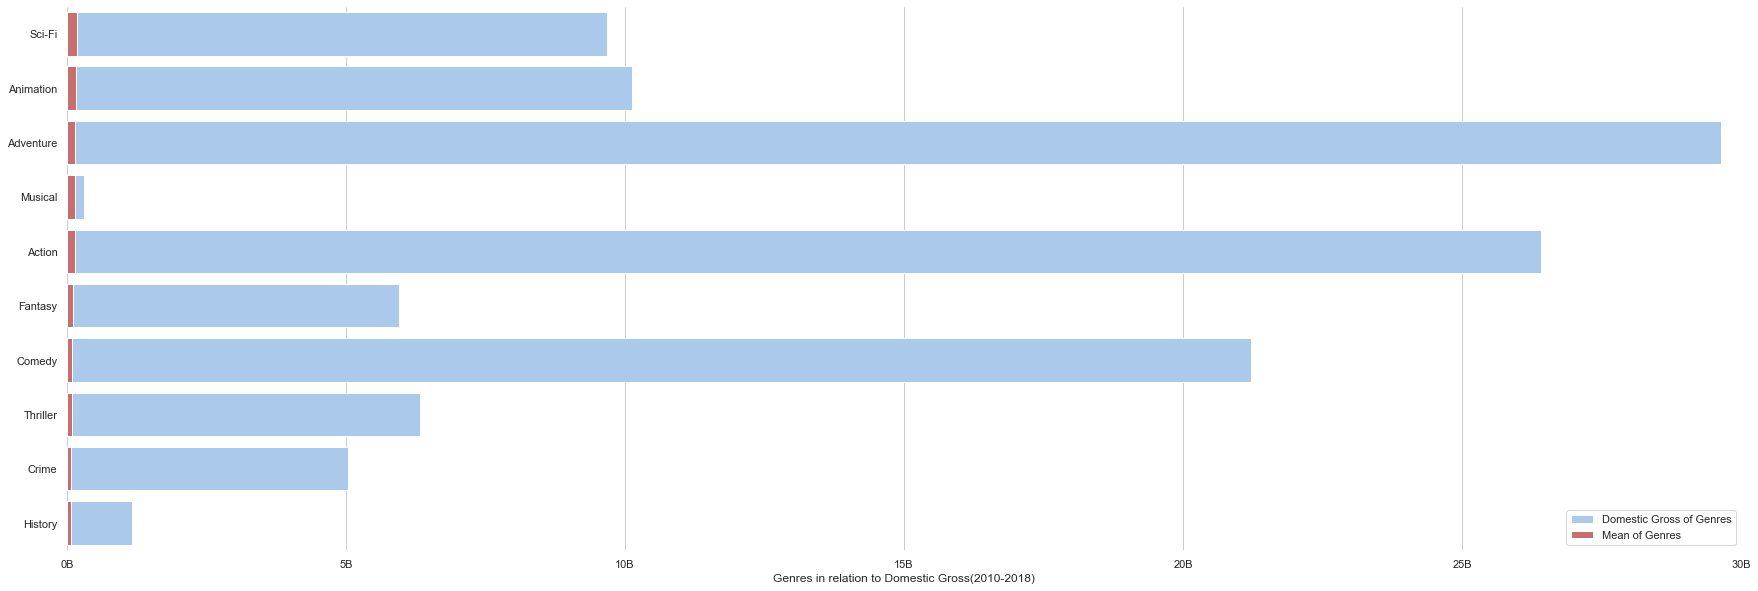

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
import matplotlib.ticker as ticker




# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))





sns.set_color_codes("pastel")
sns.barplot(x="domestic_gross", y="genres", data=graph_genre,
            label="Domestic Gross of Genres", color="b")


sns.set_color_codes("muted")
sns.barplot(x="mean", y="genres", data=graph_genre,
            label="Mean of Genres", color="r")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 30_000_000_000), ylabel="",
       xlabel="Genres in relation to Domestic Gross(2010-2018)")
sns.despine(left=True, bottom=True)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1_000_000_000) + 'B'))


In [32]:
genre_gross10

,genres,domestic_gross,no_movies
1,Adventure,"29,640,590,998",197
2,Action,"26,418,817,499",194
3,Comedy,"21,221,635,996",224
4,Drama,"11,548,252,500",177
5,Animation,"10,118,499,998",66
6,Sci-Fi,"9,683,600,000",52
7,Thriller,"6,321,613,500",74
8,Fantasy,"5,957,162,000",55
9,Crime,"5,039,122,000",64
10,Family,"4,022,700,000",52


## 2. Mean of the Domestic Gross in relation to top 10 genres



In [33]:
graph_genre

,Unnamed: 0,genres,domestic_gross,no_movies,mean
0,1,Sci-Fi,9.683600e+09,52,1.862231e+08
1,2,Animation,1.011850e+10,66,1.533106e+08
2,3,Adventure,2.964059e+10,197,1.504599e+08
3,4,Musical,2.949000e+08,2,1.474500e+08
4,5,Action,2.641882e+10,194,1.361795e+08
5,6,Fantasy,5.957162e+09,55,1.083120e+08
6,7,Comedy,2.122164e+10,224,9.473945e+07
7,8,Thriller,6.321614e+09,74,8.542721e+07
8,9,Crime,5.039122e+09,64,7.873628e+07
9,10,History,1.167800e+09,15,7.785333e+07


# Second Graph


## Top 10 Genres 

### Highlighting the top genres of the top 5 Studios in relation to the domestic gross mean in the period 2010-2018 



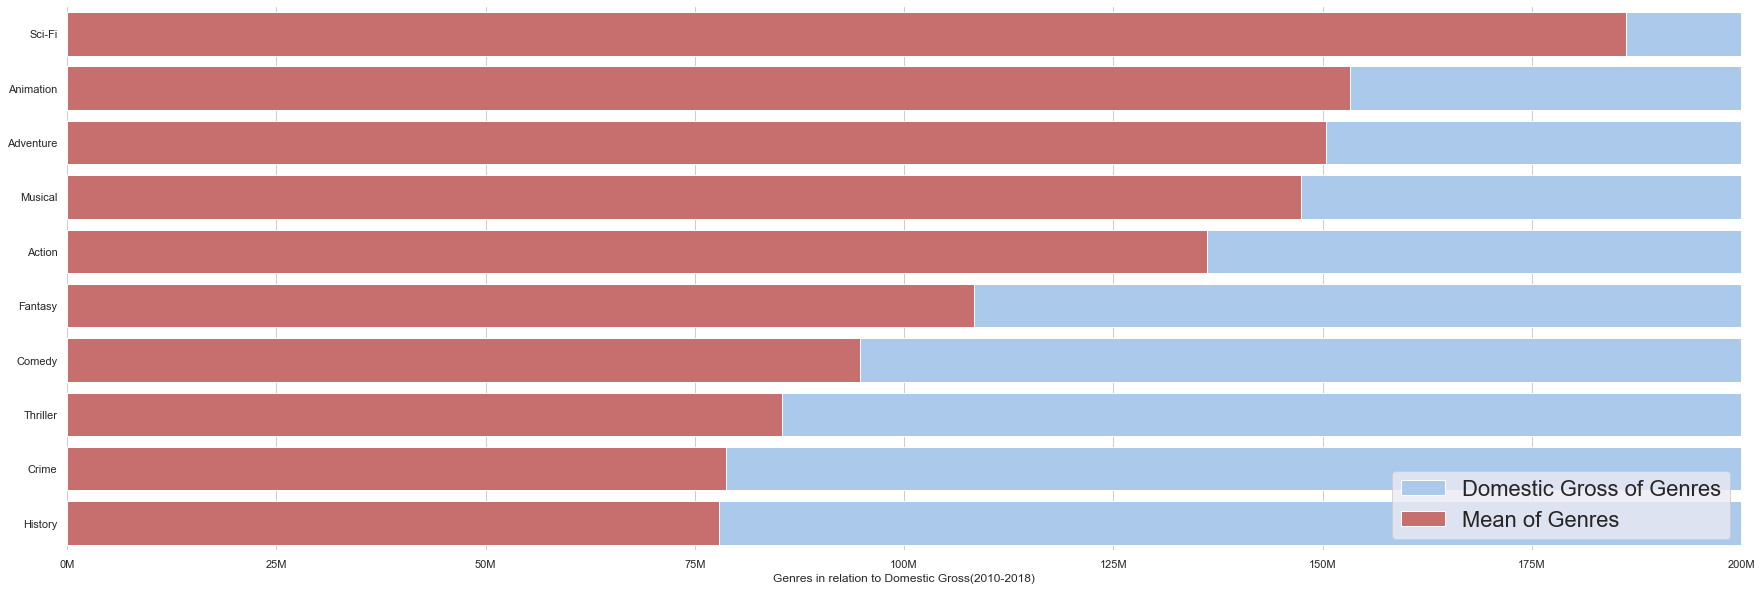

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")




# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))




sns.set(font_scale = 2)
sns.set_color_codes("pastel")
sns.barplot(x="domestic_gross", y="genres", data=graph_genre,
            label="Domestic Gross of Genres", color="b")


sns.set_color_codes("muted")
sns.barplot(x="mean", y="genres", data=graph_genre,
            label="Mean of Genres", color="r")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 200_000_000), ylabel="",
       xlabel="Genres in relation to Domestic Gross(2010-2018)")
sns.despine(left=True, bottom=True)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1_000_000) + 'M'))


In [35]:
#TOP 10 GENRES IN RELATION TO TOTAL DOMESTIC GROSS MEAN IN PERIOD 2010-2018.

#Changing str into float values in column domestic_gross 
graph_genre['mean'] = graph_genre['mean'].astype('float')

#Changing taking e+ off the values in mean and add a comma 
graph_genre.loc[:, "mean"] = graph_genre["mean"].map('{:,.0f}'.format)
graph_genre

,Unnamed: 0,genres,domestic_gross,no_movies,mean
0,1,Sci-Fi,9.683600e+09,52,"186,223,077"
1,2,Animation,1.011850e+10,66,"153,310,606"
2,3,Adventure,2.964059e+10,197,"150,459,853"
3,4,Musical,2.949000e+08,2,"147,450,000"
4,5,Action,2.641882e+10,194,"136,179,472"
5,6,Fantasy,5.957162e+09,55,"108,312,036"
6,7,Comedy,2.122164e+10,224,"94,739,446"
7,8,Thriller,6.321614e+09,74,"85,427,209"
8,9,Crime,5.039122e+09,64,"78,736,281"
9,10,History,1.167800e+09,15,"77,853,333"
